In [51]:
import seaborn as sns
import pandas as pd
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [52]:
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


In [53]:
df_subset = df[['address', 'area', 'price']]
df_subset = df_subset.drop(df_subset[df_subset.price < 30000].index)
df_subset.head()

,address,area,price
0,Knollendamstraat 4 III/IV,108,510000
1,Moerdijkstraat 47 1,47,215000
2,Zeeburgerdijk 349,116,325000
3,Brederodestraat 124 -1,58,315000
4,Admiraal De Ruijterweg 409 III,63,200000


In [54]:
x = df_subset[['area']]
y = df_subset['price'] 
lm = LinearRegression()
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
df_subset['price_p'] = lm.predict(x)
df_subset['resid'] = df_subset['price'] - df_subset['price_p']
df_subset.head()

,address,area,price,price_p,resid
0,Knollendamstraat 4 III/IV,108,510000,405855.880756,104144.119244
1,Moerdijkstraat 47 1,47,215000,192428.204791,22571.795209
2,Zeeburgerdijk 349,116,325000,433846.395637,-108846.395637
3,Brederodestraat 124 -1,58,315000,230915.162752,84084.837248
4,Admiraal De Ruijterweg 409 III,63,200000,248409.234552,-48409.234552


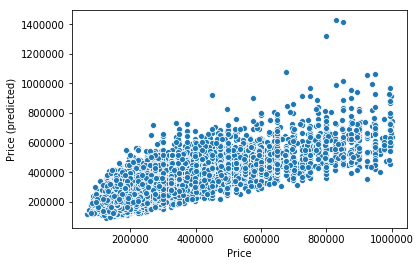

In [56]:
sns.scatterplot(x='price',y='price_p',data=df_subset)
plt.xlabel('Price')
plt.ylabel('Price (predicted)')
plt.show()

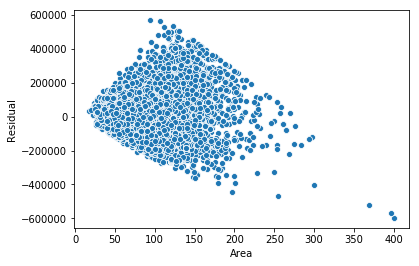

In [57]:
sns.scatterplot(x='area',y='resid',data=df_subset)
plt.xlabel('Area')
plt.ylabel('Residual')
plt.show()

In [58]:
y_p = lm.predict(x)
r2_score(df_subset['price'], df_subset['price_p'])

0.5257421182315432

In [59]:
math.sqrt(mean_squared_error(df_subset['price'], df_subset['price_p']))

118016.87861535022

The conclusion about the fit is that the actual prices of house are on average 118017 euros off. Cheaper houses are predicted better, because they have less room in the prices for variance, so they will be closer to the 'correct' price.